In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [5]:
airline=pd.read_excel('EastWestAirlines (4).xlsx')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
## Normalizing function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [7]:
## normalizing all values except ID#

airline_n=norm_func(airline.iloc[:,1:])

In [8]:
airline_n.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [9]:
airline_n.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
airline_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


In [12]:
k=list(range(10,20))
k
TWSS=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(airline_n)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(airline_n.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,airline_n.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
TWSS

[array([785.67172536]),
 array([759.73851639]),
 array([741.1149319]),
 array([725.75912298]),
 array([725.73618085]),
 array([702.18158415]),
 array([698.50590405]),
 array([665.40381323]),
 array([671.10903545]),
 array([643.80453118])]

([<matplotlib.axis.XTick at 0x1baa5f8cfa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

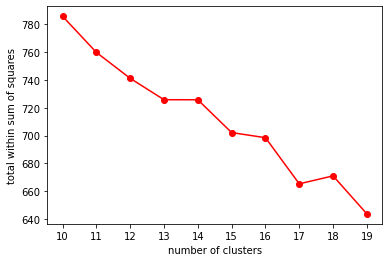

In [13]:
## Scree plot
plt.plot(k,TWSS, 'ro-');plt.xlabel('number of clusters');plt.ylabel('total within sum of squares');plt.xticks(k)

In [15]:
## considering first elbow = 14

model1=KMeans(n_clusters=14)
model1.fit(airline_n)

KMeans(n_clusters=14)

In [16]:
model1.cluster_centers_
# getting the labels of clusters assigned to each row
model1.labels_

array([5, 5, 5, ..., 4, 1, 1])

In [17]:
# converting numpy array into pandas series object 
model=pd.Series(model1.labels_)
model

0        5
1        5
2        5
3        5
4       13
        ..
3994     7
3995     7
3996     4
3997     1
3998     1
Length: 3999, dtype: int32

In [18]:
airline['clust']=model

In [22]:
model.head()

0     5
1     5
2     5
3     5
4    13
dtype: int32

In [23]:
airlinefinal=airline.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
airlinefinal

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,5,1,28143,0,1,1,1,174,1,0,0,7000,0
1,5,2,19244,0,1,1,1,215,2,0,0,6968,0
2,5,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,5,4,14776,0,1,1,1,500,1,0,0,6952,0
4,13,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,7,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,7,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,1,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
fly=airline.iloc[:,1:13].groupby(airlinefinal.clust).mean()
fly

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,189696.865672,223.621891,4.970149,1.000000,1.099502,85000.218905,23.791045,1043.885572,3.074627,5844.761194,1.0,0
1,24122.450192,102.557471,1.001916,1.000000,1.007663,2749.996169,6.019157,233.120690,0.651341,1246.501916,0.0,1
2,105350.932515,360.935583,1.156442,1.030675,1.018405,9016.325153,10.812883,1024.573620,3.269939,6061.484663,1.0,2
3,100652.881356,87.296610,2.686441,1.000000,1.012712,15726.432203,15.258475,153.258475,0.504237,5875.898305,0.0,3
4,70236.108626,165.725240,3.584665,1.000000,1.003195,33520.265176,19.287540,621.849840,1.894569,2964.335463,1.0,4
5,51896.513932,50.783282,1.024768,1.000000,1.003096,2305.380805,5.724458,189.739938,0.523220,6846.136223,0.0,5
6,43494.400000,0.000000,1.000000,2.360000,1.000000,11483.320000,13.800000,150.000000,0.600000,3544.400000,0.0,6
7,63028.000000,224.236311,1.155620,1.034582,1.000000,8694.507205,10.161383,1035.317003,3.034582,2720.501441,1.0,7
8,130475.716312,125.411348,4.212766,1.007092,1.021277,43379.191489,18.567376,258.659574,0.624113,3086.425532,0.0,8


In [ ]:
airlinefinal.to_csv("flightfinalkmewa.csv",encoding="utf-8")

In [27]:
airlinefinal['clust'].value_counts()

1     522
11    443
10    420
7     347
2     326
5     323
4     313
13    294
9     260
3     236
0     201
12    148
8     141
6      25
Name: clust, dtype: int64

We have found out that the K value = 14 considering the first elbow in the graph above.
There are a total of 14 clusters.
The highest clusters being cluster 1, 11, 20 & 7 respectively